#Project Definition

To Predict if the outcome Event will either Rain or Snow based on the input features.





Data Source

This data set is retrieved from Climate of Kansas City, https://www.ncdc.noaa.gov/data-access.
The dataset consists of seven features Temp.F, Dew_Point.F, Humidity.percentage, Sea_level_press.in, Visibility.mi, Wind.mph and Precip.in which are independent and numerical, the dependent variable outcome Events which are Snow, Rain and Rain_Thunderstorm, all together with 366 observations.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [5]:
# load the csv file
df = pd.read_csv('kc_weather_srt.csv')


In [6]:
#Removing Date column
df.drop(df.columns[[0]], axis=1, inplace=True)


In [7]:
df.head()

,Temp.F,Dew_Point.F,Humidity.percentage,Sea_Level_Press.in,Visibility.mi,Wind.mph,Precip.in,Events
0,26,12,73,30.19,5,9,0.03,Snow
1,31,18,68,29.95,7,11,0.01,Snow
2,10,1,63,30.24,5,14,0.02,Snow
3,38,35,90,29.70,6,5,0.00,Rain
4,40,30,75,29.80,9,7,0.00,Rain


In [8]:
# replace '' with nan
df = df.replace('',np.nan)

In [9]:
print('Number of samples:',len(df))

Number of samples: 366


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 8 columns):
Temp.F                 366 non-null int64
Dew_Point.F            366 non-null int64
Humidity.percentage    366 non-null int64
Sea_Level_Press.in     366 non-null float64
Visibility.mi          366 non-null int64
Wind.mph               366 non-null int64
Precip.in              366 non-null float64
Events                 366 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 23.0+ KB


In [11]:
# count the number of rows for each type
df.groupby('Events').size()

Events
Rain                 176
Rain_Thunderstorm    140
Snow                  50
dtype: int64

In [12]:
#removing thunderstorm 
condo = df['Events'].str.contains('Rain_Thunderstorm') 

In [13]:
df = df.drop(df[condo].index.values)

In [14]:
df.head()

,Temp.F,Dew_Point.F,Humidity.percentage,Sea_Level_Press.in,Visibility.mi,Wind.mph,Precip.in,Events
0,26,12,73,30.19,5,9,0.03,Snow
1,31,18,68,29.95,7,11,0.01,Snow
2,10,1,63,30.24,5,14,0.02,Snow
3,38,35,90,29.70,6,5,0.00,Rain
4,40,30,75,29.80,9,7,0.00,Rain


In [15]:
####Now let's define an output variable for our binary classification. Here we will classify Snow as 1 and Rain as 0.
df['OUTPUT_LABEL'] = (df.Events == 'Snow').astype('int')

In [16]:
df.head()

,Temp.F,Dew_Point.F,Humidity.percentage,Sea_Level_Press.in,Visibility.mi,Wind.mph,Precip.in,Events,OUTPUT_LABEL
0,26,12,73,30.19,5,9,0.03,Snow,1
1,31,18,68,29.95,7,11,0.01,Snow,1
2,10,1,63,30.24,5,14,0.02,Snow,1
3,38,35,90,29.70,6,5,0.00,Rain,0
4,40,30,75,29.80,9,7,0.00,Rain,0


In [17]:
del df['Events']

In [18]:
df.head()

,Temp.F,Dew_Point.F,Humidity.percentage,Sea_Level_Press.in,Visibility.mi,Wind.mph,Precip.in,OUTPUT_LABEL
0,26,12,73,30.19,5,9,0.03,1
1,31,18,68,29.95,7,11,0.01,1
2,10,1,63,30.24,5,14,0.02,1
3,38,35,90,29.70,6,5,0.00,0
4,40,30,75,29.80,9,7,0.00,0


In [19]:
output = df.OUTPUT_LABEL.head()

In [20]:
output.head()

0    1
1    1
2    1
3    0
4    0
Name: OUTPUT_LABEL, dtype: int32

In [21]:
print('Number of columns:',len(df.columns))

Number of columns: 8


In [229]:
#Numerical Features
cols_num = ['Temp.F','Dew_Point.F', 'Humidity.percentage', 'Sea_Level_Press.in',
       'Visibility.mi', 'Wind.mph', 'Precip.in']

In [230]:
#Let's check if there are any missing values in the numerical data.
df[cols_num].isnull().sum()

Temp.F                 0
Dew_Point.F            0
Humidity.percentage    0
Sea_Level_Press.in     0
Visibility.mi          0
Wind.mph               0
Precip.in              0
dtype: int64

In [231]:
print('Numerical Features:',len(cols_num))

Numerical Features: 7


In [232]:
# Save 30% of the data as validation and test data 
df_valid_test=df.sample(frac=0.3)
print('Split size: %.2f'%(len(df_valid_test)/len(df)))

Split size: 0.30


In [233]:
#And now split into test and validation using 50% fraction.
df_test = df_valid_test.sample(frac = 0.5)
df_valid = df_valid_test.drop(df_test.index)

In [234]:
df_train_all=df.drop(df_valid_test.index)



In [235]:
# use the rest of the data as training data

df_train_all.count()

Temp.F                 158
Dew_Point.F            158
Humidity.percentage    158
Sea_Level_Press.in     158
Visibility.mi          158
Wind.mph               158
Precip.in              158
OUTPUT_LABEL           158
dtype: int64

In [236]:
#At this point, let's check what percent of our groups are Snow. This is known as prevalence. Ideally, all three groups would have similar prevalance.
def calc_prevalence(y_actual):
    return (sum(y_actual)/len(y_actual))

In [237]:
print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prevalence(df_test.OUTPUT_LABEL.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.OUTPUT_LABEL.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values)))

Test prevalence(n = 34):0.118
Valid prevalence(n = 34):0.206
Train all prevalence(n = 158):0.247


In [238]:
#Let's verify that we used all the data.
print('all samples (n = %d)'%len(df))
assert len(df) == (len(df_test)+len(df_valid)+len(df_train_all)),'math didnt work'

all samples (n = 226)


In [239]:
#saving csv files
df_train_all.to_csv('df_train_all.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

In [240]:
#importing datasets
df_train_all = pd.read_csv('df_train_all.csv')
df_valid= pd.read_csv('df_valid.csv')

In [241]:
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.OUTPUT_LABEL.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values)))

Valid prevalence(n = 34):0.206
Train all prevalence(n = 158):0.247


In [242]:
# split the training data into positive and negative
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos))],axis = 0)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train)).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Train balanced prevalence(n = 78):0.500


In [243]:
col2use = [c for c in list(df_train_all.columns) if c != 'OUTPUT_LABEL']
print('Number of columns to use:', len(col2use))

Number of columns to use: 7


In [244]:
df_train_all.head()


,Temp.F,Dew_Point.F,Humidity.percentage,Sea_Level_Press.in,Visibility.mi,Wind.mph,Precip.in,OUTPUT_LABEL
0,26,12,73,30.19,5,9,0.03,1
1,31,18,68,29.95,7,11,0.01,1
2,10,1,63,30.24,5,14,0.02,1
3,38,35,90,29.70,6,5,0.00,0
4,36,19,45,30.02,10,9,0.00,0


In [245]:
X_train = df_train[col2use].values
X_train_all = df_train_all[col2use].values
X_valid = df_valid[col2use].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (158, 7)
Training shapes: (78, 7) (78,)
Validation shapes: (34, 7) (34,)


In [246]:
###scaler
from sklearn.preprocessing import StandardScaler

In [247]:
sc = StandardScaler()

In [248]:
X_train_tf = sc.fit_transform(X_train)

In [249]:
X_valid_tf = sc.fit_transform(X_valid)

In [250]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity 

In [251]:
thresh = 0.5 #SETTING THE TRESHOLD TO 0.5 

In [252]:
## KNN Regression model 

In [253]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train_tf, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=30, p=2,
           weights='uniform')

In [254]:
knn.predict(X_valid_tf[:,:])

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

In [255]:
knn.predict_proba(X_valid_tf[:,:])

array([[0.53333333, 0.46666667],
       [0.13333333, 0.86666667],
       [0.93333333, 0.06666667],
       [0.36666667, 0.63333333],
       [0.46666667, 0.53333333],
       [0.9       , 0.1       ],
       [0.43333333, 0.56666667],
       [0.93333333, 0.06666667],
       [0.56666667, 0.43333333],
       [0.3       , 0.7       ],
       [0.53333333, 0.46666667],
       [0.76666667, 0.23333333],
       [0.9       , 0.1       ],
       [0.43333333, 0.56666667],
       [0.63333333, 0.36666667],
       [0.03333333, 0.96666667],
       [0.96666667, 0.03333333],
       [0.4       , 0.6       ],
       [0.3       , 0.7       ],
       [0.66666667, 0.33333333],
       [0.5       , 0.5       ],
       [0.06666667, 0.93333333],
       [0.13333333, 0.86666667],
       [0.96666667, 0.03333333],
       [0.46666667, 0.53333333],
       [0.3       , 0.7       ],
       [0.5       , 0.5       ],
       [0.73333333, 0.26666667],
       [0.03333333, 0.96666667],
       [0.16666667, 0.83333333],
       [0.

In [256]:
#For class 0 i.e RAIN - the probabilities are:

knn.predict_proba(X_valid_tf[:,:])[:,0]

array([0.53333333, 0.13333333, 0.93333333, 0.36666667, 0.46666667,
       0.9       , 0.43333333, 0.93333333, 0.56666667, 0.3       ,
       0.53333333, 0.76666667, 0.9       , 0.43333333, 0.63333333,
       0.03333333, 0.96666667, 0.4       , 0.3       , 0.66666667,
       0.5       , 0.06666667, 0.13333333, 0.96666667, 0.46666667,
       0.3       , 0.5       , 0.73333333, 0.03333333, 0.16666667,
       0.4       , 0.63333333, 0.03333333, 0.53333333])

In [257]:
#For class 1 i.e SNOW - the probabilities are:
knn.predict_proba(X_valid_tf[:,:])[:,1]

array([0.46666667, 0.86666667, 0.06666667, 0.63333333, 0.53333333,
       0.1       , 0.56666667, 0.06666667, 0.43333333, 0.7       ,
       0.46666667, 0.23333333, 0.1       , 0.56666667, 0.36666667,
       0.96666667, 0.03333333, 0.6       , 0.7       , 0.33333333,
       0.5       , 0.93333333, 0.86666667, 0.03333333, 0.53333333,
       0.7       , 0.5       , 0.26666667, 0.96666667, 0.83333333,
       0.6       , 0.36666667, 0.96666667, 0.46666667])

In [258]:
import time
t1 = time.time()
y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]
t2 = time.time()
print(t2-t1)

0.0029914379119873047


In [260]:
thresh = 0.5
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, knn_train_precision, knn_train_specificity=print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, knn_valid_precision, knn_valid_specificity=print_report(y_valid,y_valid_preds, thresh);


Training:
AUC:0.969
accuracy:0.910
recall:1.000
precision:0.848
specificity:0.821
prevalence:0.500
 
Validation:
AUC:0.989
accuracy:0.706
recall:1.000
precision:0.412
specificity:0.556
prevalence:0.206
 


In [261]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_tf, y_train)

C:\Users\burra\Anaconda2\envs\pa_2018\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [262]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC:0.998
accuracy:0.949
recall:0.974
precision:0.927
specificity:0.923
prevalence:0.500
 
Validation:
AUC:0.995
accuracy:0.824
recall:1.000
precision:0.538
specificity:0.778
prevalence:0.206
 


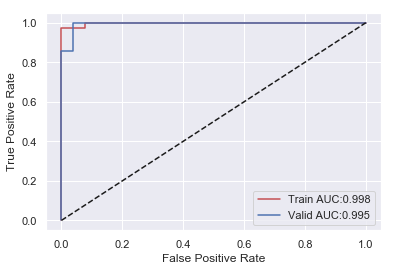

In [263]:
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)


fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [264]:
##STOCHASTIC GRADIENT CLASSIFIER
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log',alpha = 0.1)
sgdc.fit(X_train_tf, y_train)

C:\Users\burra\Anaconda2\envs\pa_2018\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.1, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [265]:
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

In [266]:
#### HYPERTUNING USING RANDOM SEARCH IN SGD 
penalty = ['none','l2','l1']
max_iter = range(200,1000,200)
alpha = [0.001,0.003,0.01,0.03,0.1,0.3]
random_grid_sgdc = {'penalty':penalty,
              'max_iter':max_iter,
              'alpha':alpha}
# create the randomized search cross-validation
sgdc_random = RandomizedSearchCV(estimator = sgdc, param_distributions = random_grid_sgdc, n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, random_state = 42)

t1 = time.time()
sgdc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

0.17054486274719238


C:\Users\burra\Anaconda2\envs\pa_2018\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [267]:
sgdc_random.best_params_

{'penalty': 'none', 'max_iter': 600, 'alpha': 0.1}

In [268]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline sgdc')
print('Training AUC:%.3f'%(roc_auc_score(y_train, y_train_preds)))
print('Validation AUC:%.3f'%(roc_auc_score(y_valid, y_valid_preds)))

print('Optimized sgdc')
y_train_preds_random = sgdc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = sgdc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
sgdc_train_auc = roc_auc_score(y_train, y_train_preds_random)
sgdc_valid_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(sgdc_train_auc))
print('Validation AUC:%.3f'%(sgdc_valid_auc))

Baseline sgdc
Training AUC:0.993
Validation AUC:0.995
Optimized sgdc
Training AUC:0.997
Validation AUC:0.995


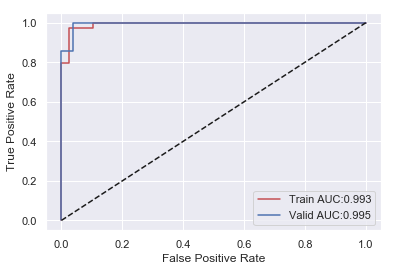

In [269]:
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)


fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [270]:
####NAIVE BAYES
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_tf, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [271]:
y_train_preds = nb.predict_proba(X_train_tf)[:,1]
y_valid_preds = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')
print('Training:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Naive Bayes
Training:
AUC:0.994
accuracy:0.949
recall:1.000
precision:0.907
specificity:0.897
prevalence:0.500
 
Validation:
AUC:0.942
accuracy:0.794
recall:0.857
precision:0.500
specificity:0.778
prevalence:0.206
 


In [272]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [273]:
y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Decision Tree
Training:
AUC:1.000
accuracy:1.000
recall:1.000
precision:1.000
specificity:1.000
prevalence:0.500
 
Validation:
AUC:0.778
accuracy:0.647
recall:1.000
precision:0.368
specificity:0.556
prevalence:0.206
 


In [274]:
##RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

C:\Users\burra\Anaconda2\envs\pa_2018\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [275]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Random Forest
Training:
AUC:1.000
accuracy:1.000
recall:1.000
precision:1.000
specificity:1.000
prevalence:0.500
 
Validation:
AUC:0.926
accuracy:0.824
recall:1.000
precision:0.538
specificity:0.778
prevalence:0.206
 


In [276]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.datasets import load_digits
from sklearn.metrics import roc_curve 

In [277]:
def plot_learning_curve(estimator,title, X, y, ylim=None, cv=3,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    print_plot_learning_curve

In [278]:
title = "learning Curves (Random Forest)"

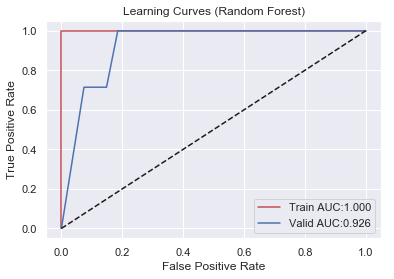

In [279]:
plt.figure()
plt.title("Learning Curves (Random Forest)")
plt.xlabel("Training examples")
plt.ylabel("AUC")

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)


fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [280]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = col2use,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [281]:
feature_importances.head()

,importance
Dew_Point.F,0.413002
Temp.F,0.347911
Sea_Level_Press.in,0.076560
Humidity.percentage,0.054255
Wind.mph,0.047929


In [282]:
# train a model for each max_depth in a list. Store the auc for the training and validation set

# max depths
max_depths = np.arange(2,20,2)

train_aucs = np.zeros(len(max_depths))
valid_aucs = np.zeros(len(max_depths))

for jj in range(len(max_depths)):
    max_depth = max_depths[jj]

    # fit model
    rf=RandomForestClassifier(n_estimators = 100, max_depth = max_depth, random_state = 42)
    rf.fit(X_train_tf, y_train)        
    # get predictions
    y_train_preds = rf.predict_proba(X_train_tf)[:,1]
    y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

    # calculate auc
    auc_train = roc_auc_score(y_train, y_train_preds)
    auc_valid = roc_auc_score(y_valid, y_valid_preds)

    # save aucs
    train_aucs[jj] = auc_train
    valid_aucs[jj] = auc_valid

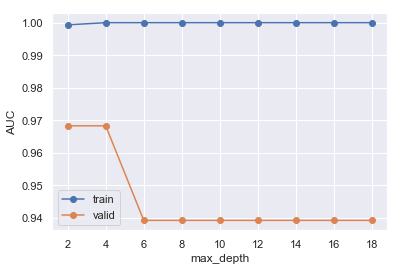

In [283]:
import matplotlib.pyplot as plt

plt.plot(max_depths, train_aucs,'o-',label = 'train')
plt.plot(max_depths, valid_aucs,'o-',label = 'valid')

plt.xlabel('max_depth')
plt.ylabel('AUC')
plt.legend()
plt.show()

In [284]:
#Hypertuning IN Random forest 

In [285]:
rf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 18,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [286]:
#Performance improvement using Random Search method# 
from sklearn.model_selection import RandomizedSearchCV

# number of trees
n_estimators = range(200,1000,200)
# maximum number of features to use at each split
max_features = ['auto','sqrt']
# maximum depth of the tree
max_depth = range(2,20,2)
# minimum number of samples to split a node
min_samples_split = range(2,10,2)
# criterion for evaluating a split
criterion = ['gini','entropy']

# random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'criterion':criterion}

print(random_grid)

{'n_estimators': range(200, 1000, 200), 'max_features': ['auto', 'sqrt'], 'max_depth': range(2, 20, 2), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


In [287]:
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

In [288]:
# create a baseline model
rf = RandomForestClassifier()

# create the randomized search cross-validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 1, random_state = 42)

In [289]:
# fit the random search model (this will take a few minutes)
t1 = time.time()
rf_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   12.8s finished
C:\Users\burra\Anaconda2\envs\pa_2018\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


13.270520687103271


In [290]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 4,
 'max_features': 'sqrt',
 'max_depth': 8,
 'criterion': 'gini'}

In [291]:
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline Random Forest')
print('Training AUC:%.3f'%(roc_auc_score(y_train, y_train_preds)))
print('Validation AUC:%.3f'%(roc_auc_score(y_valid, y_valid_preds)))

print('Optimized Random Forest')
y_train_preds_random = rf_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = rf_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

rf_train_auc = roc_auc_score(y_train, y_train_preds_random)
rf_valid_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(rf_train_auc))
print('Validation AUC:%.3f'%(rf_valid_auc))

Baseline Random Forest
Training AUC:1.000
Validation AUC:0.926
Optimized Random Forest
Training AUC:1.000
Validation AUC:0.958


C:\Users\burra\Anaconda2\envs\pa_2018\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [292]:
#GRADIENT BOOST
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [293]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Gradient Boosting Classifier
Training:
AUC:1.000
accuracy:1.000
recall:1.000
precision:1.000
specificity:1.000
prevalence:0.500
 
Validation:
AUC:0.937
accuracy:0.765
recall:1.000
precision:0.467
specificity:0.704
prevalence:0.206
 


In [294]:
# number of trees
n_estimators = range(100,500,100)

# maximum depth of the tree
max_depth = range(1,10,1)

# learning rate
learning_rate = [0.001,0.003,0.01,0.03,0.1,0.3]

# random grid

random_grid_gbc = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'learning_rate':learning_rate}

# create the randomized search cross-validation
gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid_gbc, n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, random_state = 42)

t1 = time.time()
gbc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

1.909891128540039


C:\Users\burra\Anaconda2\envs\pa_2018\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [295]:
gbc_random.best_params_

{'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.3}

In [296]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline gbc')
print('Training AUC:%.3f'%(roc_auc_score(y_train, y_train_preds)))
print('Validation AUC:%.3f'%(roc_auc_score(y_valid, y_valid_preds)))

print('Optimized gbc')
y_train_preds_random = gbc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = gbc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
gbc_train_auc = roc_auc_score(y_train, y_train_preds_random)
gbc_valid_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(gbc_train_auc))
print('Validation AUC:%.3f'%(gbc_valid_auc))

Baseline gbc
Training AUC:1.000
Validation AUC:0.937
Optimized gbc
Training AUC:1.000
Validation AUC:0.870


In [ ]:
####ANALYZE RESULTS FOR ALL THE MODELS #### BEFORE HYPERTUNING 
df_results = pd.DataFrame({'classifier':['KNN','KNN','LR','LR','SGD','SGD','NB','NB','DT','DT','RF','RF','GB','GB'],
                           'data_set':['train','valid']*7,
                          'auc':[knn_train_auc, knn_valid_auc,lr_train_auc,lr_valid_auc,sgdc_train_auc,sgdc_valid_auc,nb_train_auc,nb_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,gbc_valid_auc,gbc_valid_auc,],
                          'accuracy':[knn_train_accuracy, knn_valid_accuracy,lr_train_accuracy,lr_valid_accuracy,sgdc_train_accuracy,sgdc_valid_accuracy,nb_train_accuracy,nb_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,gbc_valid_accuracy,gbc_valid_accuracy,],
                          'recall':[knn_train_recall, knn_valid_recall,lr_train_recall,lr_valid_recall,sgdc_train_recall,sgdc_valid_recall,nb_train_recall,nb_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,gbc_valid_recall,gbc_valid_recall,],
                          'precision':[knn_train_precision, knn_valid_precision,lr_train_precision,lr_valid_precision,sgdc_train_precision,sgdc_valid_precision,nb_train_precision,nb_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,gbc_valid_auc,gbc_valid_precision,],
                          'specificity':[knn_train_specificity, knn_valid_specificity,lr_train_specificity,lr_valid_specificity,sgdc_train_specificity,sgdc_valid_specificity,nb_train_specificity,nb_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,gbc_valid_specificity,gbc_valid_specificity,]})

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

In [ ]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

In [ ]:
ax = sns.barplot(x="classifier", y="recall", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('recall', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

In [ ]:
ax = sns.barplot(x="classifier", y="specificity", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('specificity', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

In [ ]:
ax = sns.barplot(x="classifier", y="precision", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('precision', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

In [ ]:
ax = sns.barplot(x="classifier", y="accuracy", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('accuracy', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

In [ ]:
df_results = pd.DataFrame({'classifier':['SGD','SGD','RF','RF', 'GB','GB',],
                           'data_set':['train','valid']*3,
                          'auc':[sgdc_train_auc,sgdc_valid_auc,rf_train_auc,rf_valid_auc,],
                          })

In [ ]:
df_results

In [ ]:
##### METRICS FOR SGD, RF AND GB AFTER HYPER TUNING #####

In [ ]:
##ANALYZE NEW RESULTS ##
df_results = pd.DataFrame({'classifier':['SGD','SGD','RF','RF','GB','GB'],
                           'data_set':['train','valid']*3,
                          'auc':[sgdc_train_auc,sgdc_valid_auc,rf_train_auc,rf_valid_auc,gbc_train_auc,gbc_valid_auc,],
                          })

In [ ]:
df_results

In [ ]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

In [ ]:
####### TRAINING SET, VALIDATION SET AND TEST SET EVALUATION FOR THE FINAL SGD CLASSIFIER MODEL ### 

In [301]:
#####final model## evaluating results 

In [302]:
## save the classfier # 
import pickle
pickle.dump(sgdc_random.best_estimator_, open('best_classifier.pkl', 'wb'),protocol = 4)

In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [304]:
import pickle
# load the model
best_model = pickle.load(open('best_classifier.pkl','rb'))


In [305]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

def calc_prevalence(y_actual):
    return (sum(y_actual)/len(y_actual))

def fill_my_missing(df, df_mean_in):
    # This function fills the missing values

    for c in col2use:
        mean_value = df_mean_in.loc[df_mean_in.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df

def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity 

In [306]:
df_train = pd.read_csv('df_train_all.csv')
df_valid= pd.read_csv('df_valid.csv')
df_test= pd.read_csv('df_test.csv')

In [307]:
col2use = [c for c in list(df_train.columns) if c != 'OUTPUT_LABEL']
print('Number of columns to use:', len(col2use))

Number of columns to use: 7


In [308]:
df_mean = df_train[col2use].mean(axis = 0)
# save the means
df_mean.to_csv('df_mean.csv',index=True)

In [309]:
# load the means so we know how to do it for the test data
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])



In [310]:
def fill_my_missing(df, df_mean_in):
    # This function fills the missing values

    for c in col2use:
        mean_value = df_mean_in.loc[df_mean_in.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df


In [311]:
# fill missing
df_train = fill_my_missing(df_train, df_mean_in)
df_valid = fill_my_missing(df_valid, df_mean_in)
df_test = fill_my_missing(df_test, df_mean_in)


In [312]:
# create X and y matrices
X_train = df_train[col2use].values
X_valid = df_valid[col2use].values
X_test = df_test[col2use].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values
y_test = df_test['OUTPUT_LABEL'].values

In [313]:
# create scaler
scaler  = StandardScaler()
scaler.fit(X_train_all)
import pickle
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [314]:
# load the scaler
scaler = pickle.load(open('scaler.sav', 'rb'))


In [315]:

# transform our data matrices 
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

In [316]:
#Predictions#
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

In [317]:
#EVALUATE THE PERFORMANCE##

thresh = 0.5

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid,y_valid_preds, thresh)
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,y_test_preds, thresh)

Training:
AUC:0.994
accuracy:0.861
recall:1.000
precision:0.639
specificity:0.815
prevalence:0.247
 
Validation:
AUC:0.995
accuracy:0.853
recall:1.000
precision:0.583
specificity:0.815
prevalence:0.206
 
Test:
AUC:1.000
accuracy:0.912
recall:1.000
precision:0.571
specificity:0.900
prevalence:0.118
 


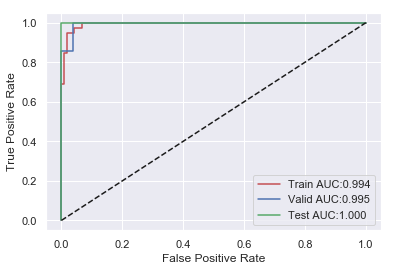

In [319]:
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()